# Data Preprocessing

Import the data

In [1]:
import pandas as pd
from collections import Counter
import numpy as np

# Importing csv files
data = pd.read_csv('food_kor.csv')

data = pd.DataFrame(data)


data1 = pd.read_csv('processed_food.csv')

data1 = pd.DataFrame(data1)

<ipython-input-1-7656f3bac858>:11: DtypeWarning: Columns (10,12,14,16,17,30,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('processed_food.csv')


In [2]:
print("size of first dataset:",data.shape)
print("size of second dataset:", data1.shape)

size of first dataset: (7704, 100)
size of second dataset: (77773, 91)


To combine the datasets from the two csv files, select the attributes, rename them, and merge the datasets

In [3]:
# Data navigation (data information and statistics summary)
# print("----------Information of Food dataset----------")
# print(data.info())
# print("---------------------------------------")
# print("\n")
# print("----------Statistical of Food dataset----------")
# print(data.describe())
# print("-----------------------------------------------------------")
# print("\n")


# Select the attributes required for data analysis
selected_features = ['식품명', '에너지(㎉)', '지방(g)',
                     '총 포화 지방산(g)', '콜레스테롤(㎎)',
                     '나트륨(㎎)', '탄수화물(g)',
                     '총당류(g)', '단백질(g)','비타민 C(㎎)', '칼슘(㎎)']

data = data[selected_features]
data1 = data1[selected_features]

# Reset Attribute Name
new_column_names = ['name', 'calories', 'total_fat',
                    'sat_fat', 'cholesterol', 'sodium',
                    'total_carb', 'sugar', 'protein',
                    'vit_c', 'calcium']

data = data.rename(columns=dict(zip(selected_features, new_column_names)))
data1 = data1.rename(columns=dict(zip(selected_features, new_column_names)))

In [4]:
# Merge the two dataset
data = pd.concat([data,data1])
print(data.head())

   name calories total_fat sat_fat cholesterol   sodium total_carb sugar  \
0  꿩불고기    368.8       8.5     1.9      106.18  1264.31       39.7  16.9   
1   닭갈비   595.61      25.8       6       193.4  1535.83       44.9  21.2   
2   닭갈비   558.47      31.6    11.3      217.67  1016.94       23.1   8.5   
3   닭꼬치   176.72      8.57    2.32       31.44   286.91      13.35  3.15   
4  더덕구이      184       5.2     0.8        0.12   743.37       31.1  11.6   

  protein vit_c calcium  
0    33.5  2.99  105.61  
1    45.9  5.54   98.64  
2    45.5     0   63.06  
3   11.56     0   17.68  
4     3.1  1.34   46.42  


Code to determine which values are stored as strings in each column

In [5]:
# Code for output without omitting any rows
pd.set_option('display.max_rows', None)
# Code for output without omitting any columns
pd.set_option('display.max_columns', None)
# Code for output without restriction
np.set_printoptions(threshold=np.inf)

There are cases where the character variable is included in the attributes that originally need to <br>include the integer variable or float variable in the dataset, so the code executed to confirm this.

In [6]:
string_values = data.loc[data['calcium'].apply(lambda x: isinstance(x, str)), 'calcium']

# Get the unique string values
unique_values = string_values.unique()

# Print the unique string values
# unique_values

In [7]:
# Returns the number of rows with missing value
# print((data == '-').sum(axis=0))

count = (data == '-').sum(axis=0)
print("Number of coulmns with '-' :", count)

# Replaces all data stored as strings with a float type
data = data.replace('-', np.nan)
data = data.replace('1g 미만', 0)
data = data.replace('0.5미만', 0)
data = data.replace('0.5g미만', 0)
data = data.replace('0.5g 미만', 0)
data = data.replace('0.5 미만', 0)
data = data.replace('1g미만', 0)
data = data.replace('1g 미만', 0)
data = data.replace('5 미만', 0)
data = data.replace('5미만', 0)
data = data.replace('5mg미만', 0)
data = data.replace('5mg 미만', 0)
data = data.replace('2미만', 0)
data = data.replace('2g미만', 0)
data = data.replace('5이하', 0)
data = data.replace('1 미만', 0)
data = data.replace('3g미만', 0)
data = data.replace('13미만', 12)
data = data.replace('11 미만', 10)
data = data.replace('1미만', 0)
data = data.replace('1 g 미만',0)


Number of coulmns with '-' : name               0
calories         109
total_fat      10346
sat_fat         3560
cholesterol    14603
sodium          2433
total_carb      8673
sugar           1445
protein         2903
vit_c          82879
calcium        81335
dtype: int64


The process of checking all variables that need to be in the float type after changing them to the float type

In [8]:
float_cols = ['calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar', 'protein', 'vit_c', 'calcium']
data[float_cols] = data[float_cols].astype(float)

print(data.dtypes)

name            object
calories       float64
total_fat      float64
sat_fat        float64
cholesterol    float64
sodium         float64
total_carb     float64
sugar          float64
protein        float64
vit_c          float64
calcium        float64
dtype: object


In [9]:
print("Number of nulls in attribute 'calories':",data["calories"].isnull().sum())
print("Number of nulls in attribute 'total_fat':",data["total_fat"].isnull().sum())
print("Number of nulls in attribute 'sat_fat':",data["sat_fat"].isnull().sum())
print("Number of nulls in attribute 'sodium':",data["sodium"].isnull().sum())
print("Number of nulls in attribute 'total_carb':",data["total_carb"].isnull().sum())
print("Number of nulls in attribute 'sugar':",data["sugar"].isnull().sum())
print("Number of nulls in attribute 'protein':",data["protein"].isnull().sum())
print("Number of nulls in attribute 'vit_c':",data["vit_c"].isnull().sum())
print("Number of nulls in attribute 'calcium':",data["calcium"].isnull().sum())



Number of nulls in attribute 'calories': 109
Number of nulls in attribute 'total_fat': 10346
Number of nulls in attribute 'sat_fat': 3560
Number of nulls in attribute 'sodium': 2433
Number of nulls in attribute 'total_carb': 8673
Number of nulls in attribute 'sugar': 1445
Number of nulls in attribute 'protein': 2903
Number of nulls in attribute 'vit_c': 82879
Number of nulls in attribute 'calcium': 81335


Deleting both attributes because there are too many nulls in attribute 'vit_c' and 'calcium'

In [10]:
data = data.iloc[:,:-2]
print(data.columns)

Index(['name', 'calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium',
       'total_carb', 'sugar', 'protein'],
      dtype='object')


Find the correlation between the variables and replace it with one variable if there are two variables that have a very strong correlation

             calories  total_fat   sat_fat  cholesterol    sodium  total_carb  \
calories     1.000000   0.393871  0.748779     0.526673  0.215769    0.832764   
total_fat    0.393871   1.000000  0.491199     0.594036  0.089151    0.242074   
sat_fat      0.748779   0.491199  1.000000     0.617545  0.161534    0.477444   
cholesterol  0.526673   0.594036  0.617545     1.000000  0.268497    0.375765   
sodium       0.215769   0.089151  0.161534     0.268497  1.000000    0.184392   
total_carb   0.832764   0.242074  0.477444     0.375765  0.184392    1.000000   
sugar        0.812934   0.241979  0.489582     0.381889  0.114624    0.965501   
protein      0.666086   0.381041  0.714845     0.653890  0.437136    0.495585   

                sugar   protein  
calories     0.812934  0.666086  
total_fat    0.241979  0.381041  
sat_fat      0.489582  0.714845  
cholesterol  0.381889  0.653890  
sodium       0.114624  0.437136  
total_carb   0.965501  0.495585  
sugar        1.000000  0.415754 

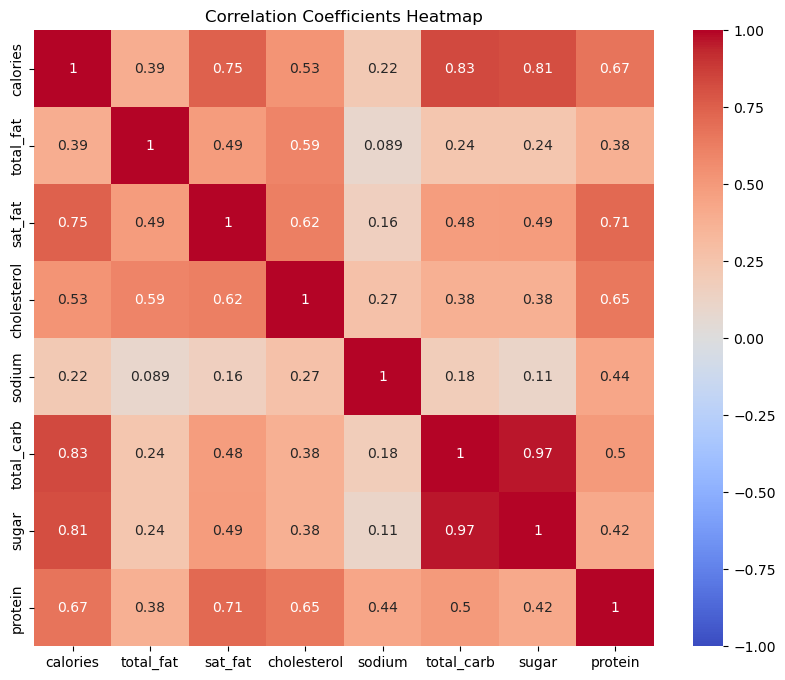

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title of the heatmap
plt.title('Correlation Coefficients Heatmap')

# Show the heatmap
plt.show()

There is a very strong correlation (0.97) between 'sugar' and 'total_carb', and there is a strong positive correlation between 'sugar' and 'calories', 'total_carb' and 'calories', respectively (0.81, 0.83)
<br>-> Therefore, replace 'sugar' with 'total_carbs'. Delete attribute 'sugar'

In [12]:
data = data.drop('sugar', axis=1)
print(data.head())

   name  calories  total_fat  sat_fat  cholesterol   sodium  total_carb  \
0  꿩불고기    368.80       8.50     1.90       106.18  1264.31       39.70   
1   닭갈비    595.61      25.80     6.00       193.40  1535.83       44.90   
2   닭갈비    558.47      31.60    11.30       217.67  1016.94       23.10   
3   닭꼬치    176.72       8.57     2.32        31.44   286.91       13.35   
4  더덕구이    184.00       5.20     0.80         0.12   743.37       31.10   

   protein  
0    33.50  
1    45.90  
2    45.50  
3    11.56  
4     3.10  


replace the missing value. Non-robust when replaced by means, so extreme values do not represent the overall data -> Replace with a more robust method : median

In [13]:
# resetting numpy array output options
np.set_printoptions(threshold=10)

In [14]:
# Dataset consisting of columns except 'name' column
data_for_median = data.drop(columns=['name'])

# Calculate the median of each column
median_values = data_for_median.median()

# Replace missing values
for column in data_for_median.columns:
    data[column].fillna(median_values[column], inplace=True)

print(data.head(20))

       name  calories  total_fat  sat_fat  cholesterol   sodium  total_carb  \
0      꿩불고기    368.80       8.50     1.90       106.18  1264.31       39.70   
1       닭갈비    595.61      25.80     6.00       193.40  1535.83       44.90   
2       닭갈비    558.47      31.60    11.30       217.67  1016.94       23.10   
3       닭꼬치    176.72       8.57     2.32        31.44   286.91       13.35   
4      더덕구이    184.00       5.20     0.80         0.12   743.37       31.10   
5      도미구이    397.00      16.50     3.80       211.24  1582.17        2.10   
6      돼지갈비    240.32      14.40     4.70        49.34   404.66        8.10   
7      병어구이    488.00      30.80     8.90       198.51  1567.94        0.20   
8       불고기    395.29      25.20     6.60        68.85   560.71        7.80   
9   붕장어소금구이    296.54      16.20     3.60       167.07   124.75       11.60   
10  소양념갈비구이    989.15      71.60    27.20       186.63  1378.45       26.20   
11    양념왕갈비    480.81      35.30    13.00        58.

In [15]:
# Ensure missing value replacement is successful
data.isnull().sum()

name           0
calories       0
total_fat      0
sat_fat        0
cholesterol    0
sodium         0
total_carb     0
protein        0
dtype: int64

Prior to replacing or eliminating extremes, each food in this dataset has a variety of capacities, which may result in a range of nutritional content levels. Therefore, it aims to eliminate only very extreme values.

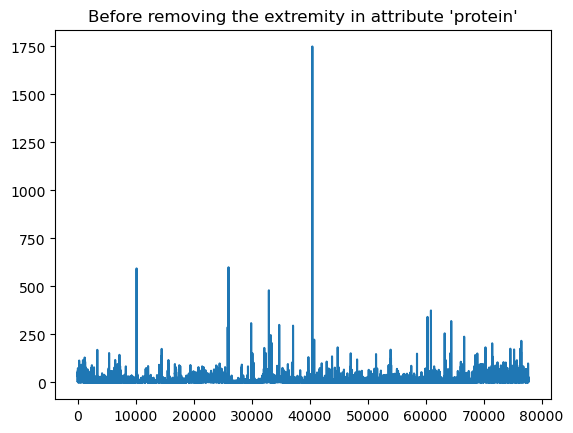

In [16]:
# When viewing a distribution with a histogram, if there is a severe extreme value, 
# the distribution is not easily visible, so check the distribution with a plot
plt.plot(data["protein"])
plt.title("Before removing the extremity in attribute 'protein'")
plt.show()

In [17]:
data[data["protein"]>1000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
40456,베리컬리벗 다크초콜릿,122500.0,8500.0,4000.0,5000.0,10000.0,10000.0,1500.0
40457,베리컬리벗 밀크초콜릿,134500.0,8500.0,5500.0,8000.0,10000.0,13000.0,1500.0
40458,베리컬리벗 화이트초콜릿,135750.0,7775.0,4675.0,6625.0,24750.0,14650.0,1750.0


In [18]:
# Remove rows with values greater than 1000 from the "protein" column
data = data[data['protein'] < 1000]

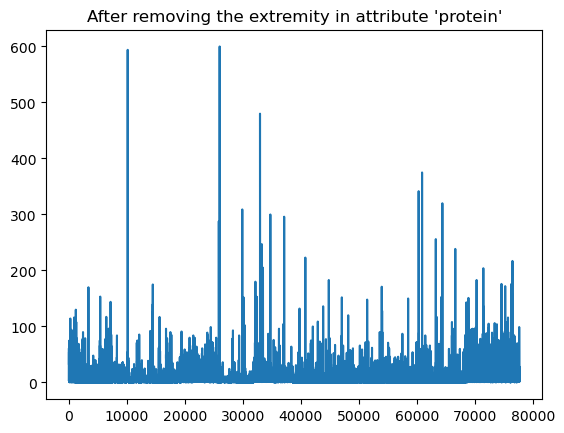

In [19]:
# After removing the extremity
plt.plot(data["protein"])
plt.title("After removing the extremity in attribute 'protein'")
plt.show()

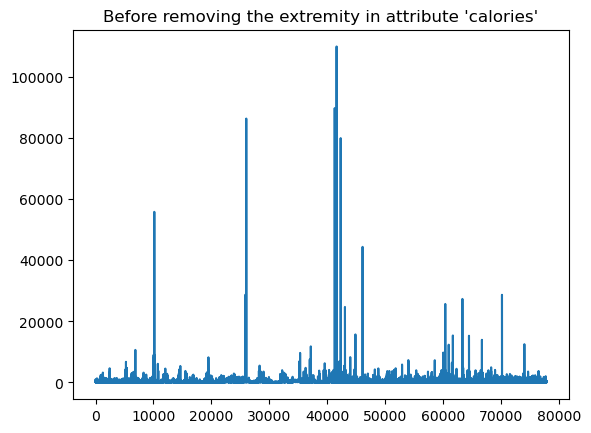

In [20]:
plt.plot(data["calories"])
plt.title("Before removing the extremity in attribute 'calories'")
plt.show()

In [21]:
# Remove rows with values greater than 10000 from the "calories" column
# Since the food we eat in our daily lives does not exceed 10,000 kcal
data = data[data['calories'] < 10000]

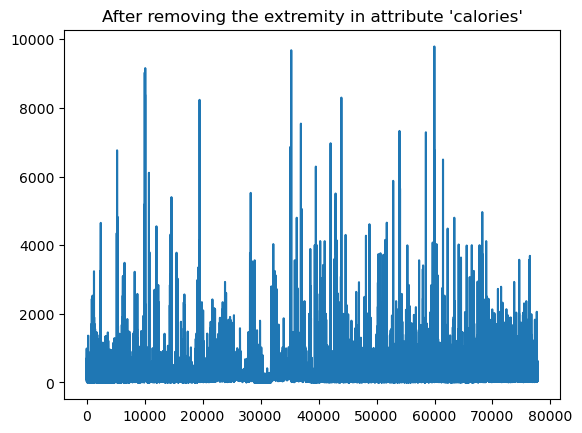

In [22]:
# After removing the extremity
plt.plot(data["calories"])
plt.title("After removing the extremity in attribute 'calories'")
plt.show()

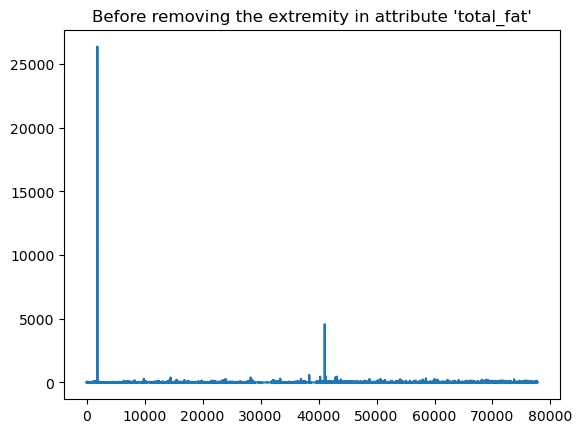

In [23]:
# When viewing a distribution with a histogram, if there is a severe extreme value, 
# the distribution is not easily visible, so check the distribution with a plot
plt.plot(data["total_fat"])
plt.title("Before removing the extremity in attribute 'total_fat'")
plt.show()

In [24]:
data[data['total_fat'] > 4000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
1852,월넛치노 venti,807.44,26374.0,5.67,0.765,161.66,127.93,15.37
41059,코브람 에스테이트 퍼스트 하비스트 엑스트라 버진 올리브 오일,4118.00,4575.5,77.60,0.000,0.00,0.00,0.00


For example, "월넛치노 venti", it appears to be a decimal notation error 
<br>-> To correct the value

In [25]:
data.iloc[1852,2] = 26.374

In [26]:
data.iloc[1852,:]

name           월넛치노 venti 
calories            807.44
total_fat           26.374
sat_fat               5.67
cholesterol          0.765
sodium              161.66
total_carb          127.93
protein              15.37
Name: 1852, dtype: object

In [27]:
data = data[data['total_fat'] < 4000]

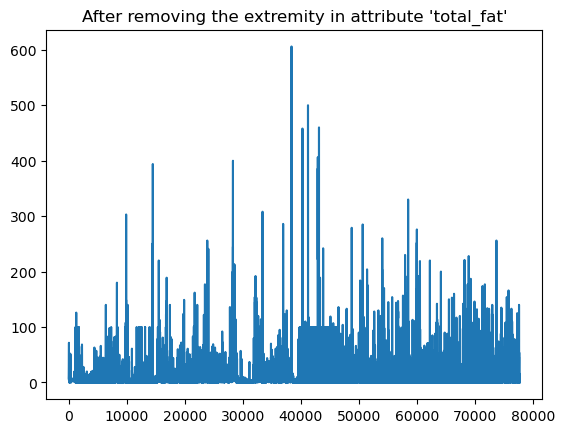

In [28]:
# After removing the extremity
plt.plot(data["total_fat"])
plt.title("After removing the extremity in attribute 'total_fat'")
plt.show()

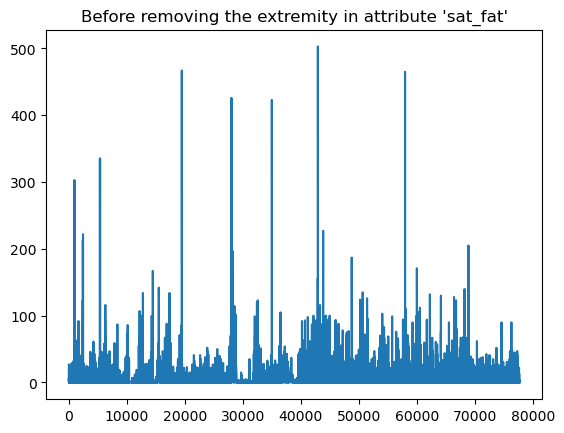

In [29]:
plt.plot(data["sat_fat"])
plt.title("Before removing the extremity in attribute 'sat_fat'")
plt.show()

The attribute "sat_fat" does not show a very large extreme, so it does not remove the extreme.

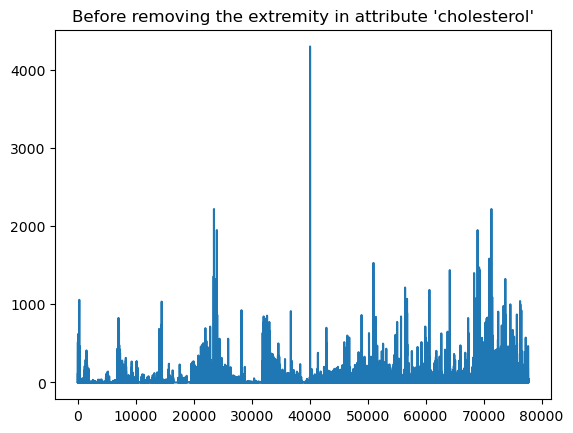

In [30]:
# View the distribution of 'Cholesterol'
plt.plot(data["cholesterol"])
plt.title("Before removing the extremity in attribute 'cholesterol'")
plt.show()

In [31]:
data[data['cholesterol']>4000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
40063,크릴오일,8.4,99.06,21.5,4300.0,0.16,0.0,0.0


In [32]:
data = data[data['cholesterol'] < 4000]

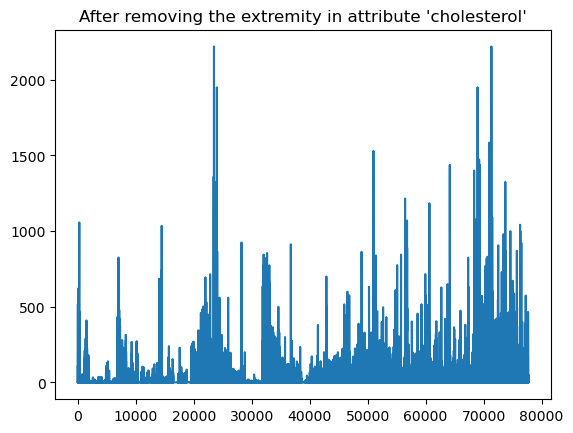

In [33]:
# After removing the extremity
plt.plot(data["cholesterol"])
plt.title("After removing the extremity in attribute 'cholesterol'")
plt.show()

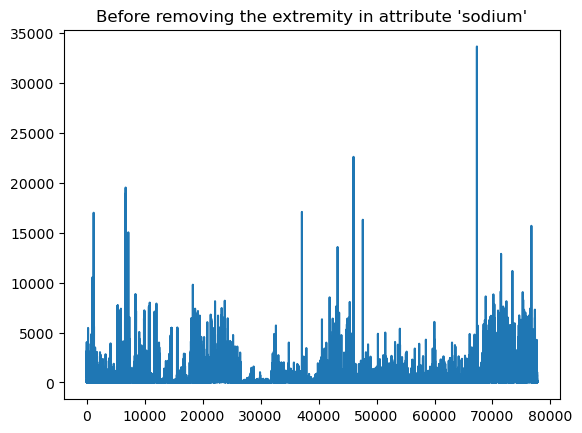

In [34]:
# View the distribution of 'Sodium'
plt.plot(data["sodium"])
plt.title("Before removing the extremity in attribute 'sodium'")
plt.show()

In [35]:
data[data['sodium']>30000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
67313,퀸아망,256.0,8.0,0.0,6.0,33654.0,38.0,9.0


In [36]:
data.loc[data['sodium'].idxmax(),"sodium"] = 336.54

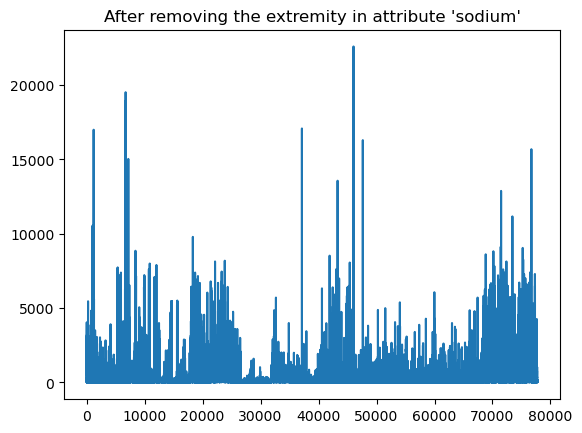

In [37]:
# After removing the extremity
plt.plot(data["sodium"])
plt.title("After removing the extremity in attribute 'sodium'")
plt.show()
# The other values above 20000 are foods that are bound to be high in sodium, 
# such as soy sauce

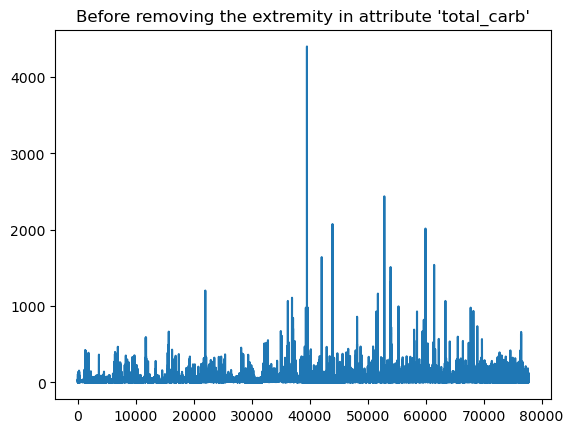

In [38]:
# View the distribution of 'total_carb'
plt.plot(data["total_carb"])
plt.title("Before removing the extremity in attribute 'total_carb'")
plt.show()

In [39]:
data[data["total_carb"]>4000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
39528,스모크 히말라얀 핑크솔트 캐러멜(smoked hiamalayan pink salt ...,186.9,0.8,0.6,36.3,143.5,4401.0,0.8


In [40]:
# Compared to other values, it appears to be a decimal notation error 
# -> Change the value
data.loc[data['total_carb'].idxmax(),"total_carb"] = 44.01

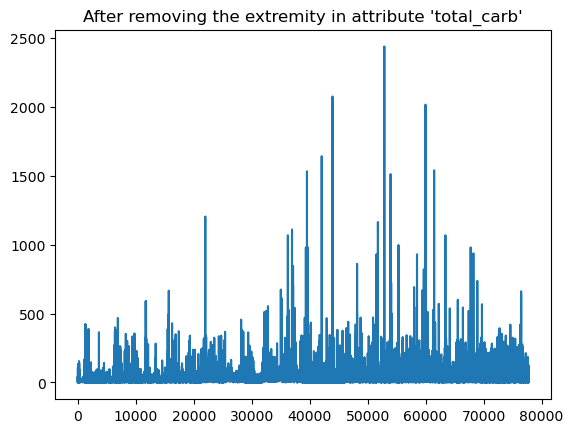

In [41]:
# After removing the extremity
plt.plot(data["total_carb"])
plt.title("After removing the extremity in attribute 'total_carb'")
plt.show()

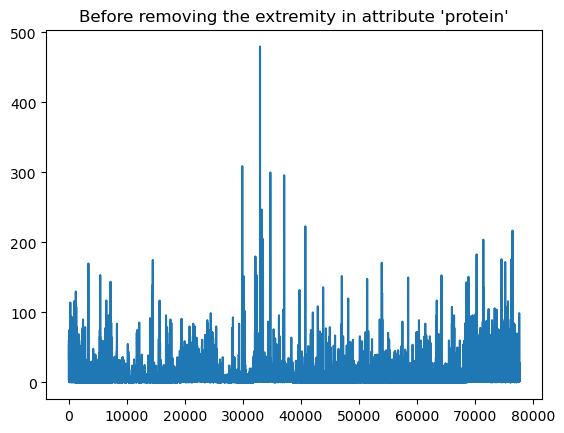

In [42]:
# View the distribution of 'protein'
plt.plot(data["protein"])
plt.title("Before removing the extremity in attribute 'protein'")
plt.show()

In [43]:
data[data['protein'] > 400]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
32963,버터크로와상,335.0,17.0,0.0,0.0,480.0,40.0,480.0


In [44]:
# Compared to other values, it appears to be a decimal notation error 
# -> Change the value
data.loc[data['protein'].idxmax(),"protein"] = 4.8

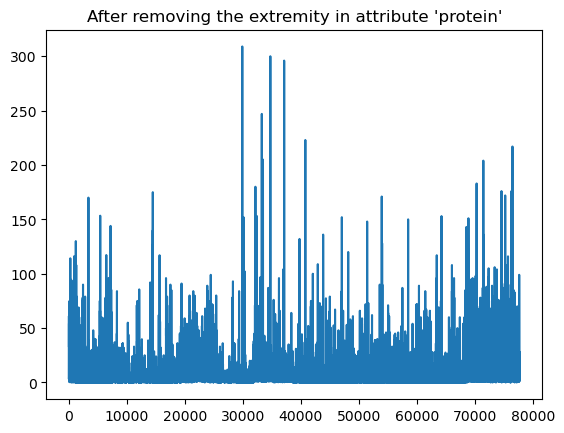

In [45]:
# After removing the extremity
plt.plot(data["protein"])
plt.title("After removing the extremity in attribute 'protein'")
plt.show()

# Scaling the Data
One suitable way to scale the given data is by using a technique called standardization. Standardization adjusts the distribution of each feature by transforming it to have a mean of 0 and a standard deviation of 1. The formula for standardization is as follows:
$Z = {X-E(X) \over \sigma(X)}$

Before Scaling

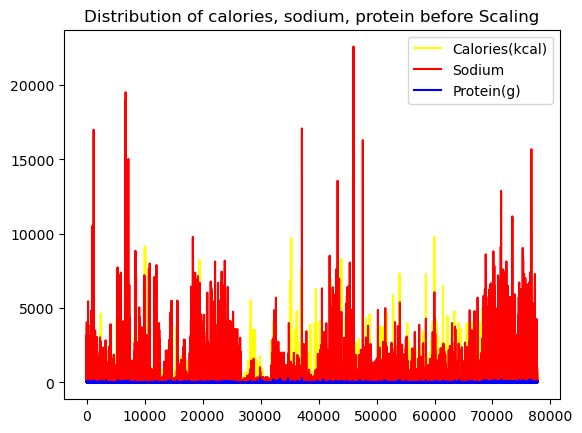

In [46]:
import matplotlib.pyplot as plt
plt.plot(data["calories"],color="yellow",label="Calories(kcal)")
plt.plot(data["sodium"],color="red",label="Sodium")
plt.plot(data["protein"],color="blue",label="Protein(g)")
plt.title("Distribution of calories, sodium, protein before Scaling")
plt.legend()
plt.show()

The units and distribution of each attribute are different, so when you draw a plot, some attributes are invisible at all. Attributes such as "sodium" might have too much influence if data is not being scaled

In [47]:
from sklearn.preprocessing import StandardScaler
df = data.copy()


# Exclude columns 'name' because they are not scaled.
numeric_columns = df.columns[1:]

# Create StandardScaler objects and convert data for standardization
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("-----------prestandard dataset----------")
print(data.head())
print("\n\n")
print("------dataset after standardization-----")
print(df.head())

-----------prestandard dataset----------
   name  calories  total_fat  sat_fat  cholesterol   sodium  total_carb  \
0  꿩불고기    368.80       8.50     1.90       106.18  1264.31       39.70   
1   닭갈비    595.61      25.80     6.00       193.40  1535.83       44.90   
2   닭갈비    558.47      31.60    11.30       217.67  1016.94       23.10   
3   닭꼬치    176.72       8.57     2.32        31.44   286.91       13.35   
4  더덕구이    184.00       5.20     0.80         0.12   743.37       31.10   

   protein  
0    33.50  
1    45.90  
2    45.50  
3    11.56  
4     3.10  



------dataset after standardization-----
   name  calories  total_fat   sat_fat  cholesterol    sodium  total_carb  \
0  꿩불고기  0.285549  -0.074091 -0.265052     1.707134  1.309130    0.086308   
1   닭갈비  0.979601   0.930605  0.181447     3.380913  1.697375    0.195944   
2   닭갈비  0.865951   1.267440  0.758629     3.846662  0.955417   -0.263683   
3   닭꼬치 -0.302227  -0.070026 -0.219313     0.272849 -0.088450   -0.469250   
4

In [48]:
df.columns

Index(['name', 'calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium',
       'total_carb', 'protein'],
      dtype='object')

In [49]:
df.shape 

(85451, 8)

85451 types of food and 8 attributes (12 out of 14 are nutritionally related attributes)

# Labeling the entire dataset


- While I was thinking about how to label data more effectively and faster, I thought it would be easier to divide the clusters and label the data set in two to three dimensions through PCA, that is, principal component analysis. This is because it is easy to identify what each main ingredient means and even create a classification question accordingly.

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponenets = pca.fit_transform(df.iloc[:,1:])
principalDf = pd.DataFrame(data = principalComponenets, columns = ["PC1","PC2","PC3"])
print(principalDf.head())


        PC1       PC2       PC3
0  2.026448 -2.391811 -1.090706
1  4.075227 -2.792743 -2.317393
2  4.094276 -2.025596 -3.113742
3 -0.180268 -0.359394 -0.532054
4 -0.506465 -0.423583  0.220448


Draw a three-dimensional plot for each PC to see if it has any characteristics in the distribution of data

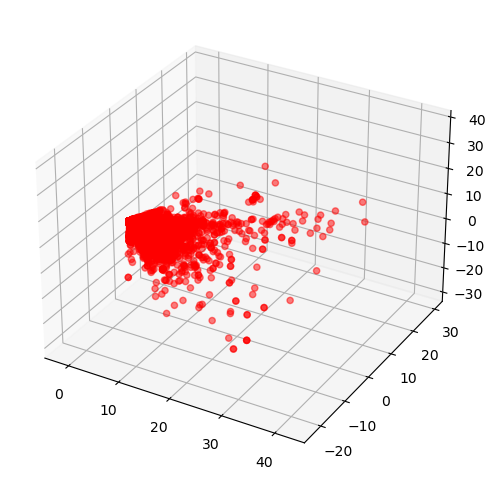

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

x = principalDf.iloc[:,0]
y = principalDf.iloc[:,1]
z = principalDf.iloc[:,2]

ax.scatter(x, y, z, color = 'r', alpha = 0.5)
plt.show()

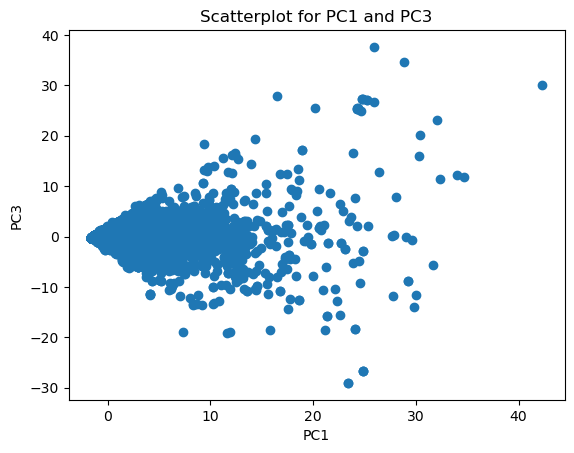

In [52]:
plt.scatter(x,z)
plt.title("Scatterplot for PC1 and PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

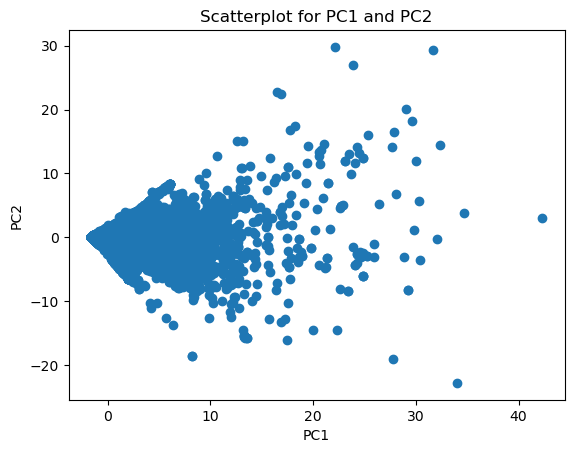

In [53]:
plt.scatter(x,y)
plt.title("Scatterplot for PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

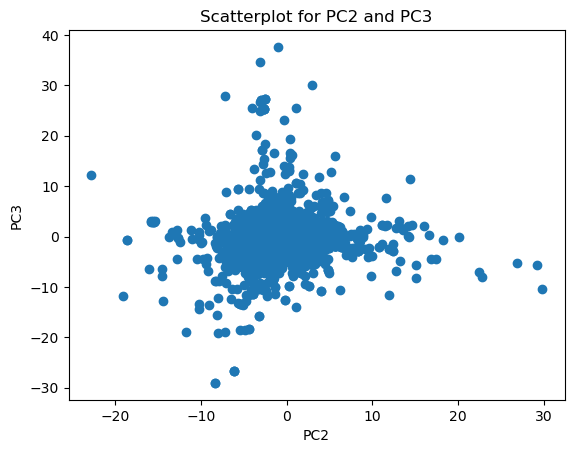

In [54]:
plt.scatter(y,z)
plt.title("Scatterplot for PC2 and PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

There is no significant feature in the distribution of data according to each PC 
<br>-> Labeling data according to the "2020 Korean Nutrient Consumption Standards" from the Ministry of Health and Welfare

- Prior to that, in order to label, it is necessary to decide which questions to pass according to the user's needs
- For example, if there are 3 views in the first question and 2 views in the second question, this is divided into 6 classes.

- Questions and Views for Labeling

Q1. What is your gender?
    1) male 2) female

Q2. What is your age group?
    1) children and early teens 2) late teens and 30s 
    3) middle-aged and elderly
    
Q3. Choose the purpose of your food intake.
    1) Diet 2) Building muscles 3) To fill the recommended intake
    


- Class1 - male -> children and early teens -> Diet
- Class2 - male -> children and early teens -> Building muscles
- Class3 - male -> children and early teens -> To fill the recommended intake
- Class4 - male -> late teens and 30s -> Diet
- Class5 - male -> late teens and 30s -> Building muscles
- Class6 - male -> late teens and 30s -> To fill the recommended intake
- Class7 - male -> middle-aged and elderly -> Diet
- Class8 - male -> middle-aged and elderly -> Building muscles
- Class9 - male -> middle-aged and elderly -> To fill the recommended intake
- Class10 - female -> children and early teens -> Diet
- Class11 - female -> children and early teens -> Building muscles
- Class12 - female -> children and early teens -> To fill the recommended intake
- Class13 - female -> late teens and 30s -> Diet
- Class14 - female -> late teens and 30s -> Building muscles
- Class15 - female -> late teens and 30s -> To fill the recommended intake
- Class16 - female -> middle-aged and elderly -> Diet
- Class17 - female -> middle-aged and elderly -> Building muscles
- Class18 - female -> middle-aged and elderly -> To fill the recommended intake


Food class for Infant

In [55]:
df['name'] = df['name'].astype('str')

Class 1

In [57]:
df.loc[(data["calories"] >= 500)& (data["calories"] < 600) & (data["total_carb"] >= 30) & (data["total_carb"] < 40), 'class'] = 1
df[df["class"] == 1].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
166,참치샌드위치,0.855332,1.470702,0.301240,0.779858,0.810497,0.018840,1.692025,1.0
1221,허니땅콩,0.965494,-0.306391,0.943763,-0.315814,-0.132648,-0.118205,1.867087,1.0
1223,캐슈넛,0.907353,-0.306391,0.290350,-0.315814,-0.435786,-0.012786,1.455176,1.0
7095,참치 샌드위치,0.703247,1.123995,0.246789,0.574329,0.247933,-0.024382,2.005078,1.0
7323,오징어튀김,0.704502,1.348164,0.087791,2.378795,0.223382,-0.041249,1.203910,1.0


Class 2

In [58]:
df.loc[(data["calories"] >= 700) & (data["calories"] < 800)& ((data['protein']>=20) & (data['protein']<=30)) & (df["class"].isnull()) ,'class']=2
df[df["class"] == 2].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
147,해물볶음밥,1.315014,1.000295,0.113928,4.309725,1.037507,1.156522,1.877385,2.0
483,화이트 크림 스파게티,1.314341,-0.306391,1.488274,-0.315814,1.427368,-0.202540,2.176021,2.0
941,로제치즈오븐스파게티,1.299041,-0.306391,1.597176,-0.315814,0.731009,-0.202540,2.176021,2.0
945,콘치즈그라탕 L,1.406143,-0.306391,3.666319,-0.315814,0.244844,-0.202540,2.073043,2.0
951,까르보나라스파게티,1.344942,-0.306391,1.052665,-0.315814,0.459329,-0.202540,1.352198,2.0


Class 3

In [59]:
df.loc[(data["calories"] >= 600) & (data["calories"] < 700 )& (data['protein']<=20)&(df["class"].isnull()),'class']=3
df[df["class"] == 3].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
85,오일소스스파게티,1.136062,0.792968,-0.048336,0.276304,1.108973,1.134595,1.306888,3.0
120,묵밥,1.122047,-0.120551,-0.308613,0.487973,2.469046,1.960658,0.816713,3.0
125,새우튀김롤,1.012925,0.487494,-0.100609,0.741669,1.490898,1.279230,0.782730,3.0
473,슈퍼곡물 치킨(10조각),1.146038,-0.306391,-0.254162,-0.315814,0.532253,-0.202540,1.043264,3.0
478,포테이토 순살치킨(3조각),1.146038,-0.306391,2.359492,-0.315814,1.107071,-0.202540,1.043264,3.0


Class 4

In [60]:
df.loc[(data["calories"] >= 700) & (data["calories"] < 800 )& ((data["total_carb"] >= 30) & (data["total_carb"] < 40)) &(df["class"].isnull()),'class']=4
df[df["class"] == 4].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
7276,오리탕,1.384998,1.718682,0.395985,4.099207,2.223190,0.017996,5.161350,4.0
28117,파베생초콜릿 다크,1.299041,3.265217,3.884123,0.820925,-0.437216,0.029382,-0.192470,4.0
28312,크리스토필 화이트,1.332701,3.090992,2.795101,-0.176972,-0.498701,-0.076037,-0.295448,4.0
32238,쌀앙버터,1.482644,3.090992,3.884123,2.797528,-0.001098,0.029382,0.425397,4.0
45378,피닉스브랜드 빈버미셀리,1.299041,-0.567728,-0.471966,-0.330494,-0.498701,-0.012786,-0.707360,4.0


Class 5

In [61]:
df.loc[(data["calories"] >= 800) & (data["calories"] < 900)& ((data['protein']>=25) & (data['protein']<=35)) & (df["class"].isnull()) ,'class']=5
df[df["class"] == 5].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
80,삼선자장면,1.616981,0.485751,-0.029823,2.865845,3.259407,1.917015,2.756816,5.0
476,퀴노아 치킨 샐러드,1.687668,-0.306391,0.725959,-0.315814,2.311043,-0.202540,2.587932,5.0
484,NEW 치즈 볼로네즈 스파게티,1.761110,-0.306391,2.686199,-0.315814,1.300107,-0.202540,2.278999,5.0
1015,스윗고구마 골드L,1.727449,-0.306391,1.270470,-0.315814,0.802504,-0.202540,2.690910,5.0
1648,인절미 눈꽃빙수,1.660128,-0.306391,0.301240,-0.315814,-0.348562,-0.202540,1.867087,5.0


Class 6

In [62]:
df.loc[(data["calories"] >= 700) & (data["calories"] < 800)& (data['protein']<=25) & (df["class"].isnull()) ,'class']=6
df[df["class"] == 6].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
90,자장면,1.594336,0.612355,0.455881,-0.124006,2.921008,2.066710,1.328513,6.0
137,자장밥,1.426523,0.726182,0.460237,0.176706,1.732479,1.780602,0.862023,6.0
791,핫하프치킨,1.448984,-0.306391,0.399252,-0.315814,2.955926,-0.202540,0.219441,6.0
878,국물떡볶이,1.592806,-0.306391,0.072545,-0.315814,1.480274,-0.202540,0.837308,6.0
1161,허니브레드,1.589134,-0.306391,1.945664,-0.315814,0.703412,-0.202540,1.341900,6.0


Class 7,8,9

In [63]:
df.loc[(data["calories"] >= 600) & (data["calories"] < 700)& ((data["total_carb"] >= 30) & (data["total_carb"] < 40)) & (df["class"].isnull()) ,'class']=7
print(df[df["class"] == 7].head())

df.loc[(data["calories"] >= 750) & (data["calories"] < 850)& ((data['protein']>=20) & (data['protein']<=25)) & (df["class"].isnull()) ,'class']=8
print(df[df["class"] == 8].head())

df.loc[(data["calories"] >= 650) & (data["calories"] < 850)& ((data['protein']>=20) & (data['protein']<=25))&(df["class"].isnull()) ,'class']=9
print(df[df["class"] == 9].head())

                name  calories  total_fat   sat_fat  cholesterol    sodium  \
275            등심돈가스  1.065956   1.612405  0.521222     1.553227  0.322173   
279            안심돈가스  1.151393   1.894649  0.459148     1.693509  0.289958   
7307       간장양념닭다리튀김  1.135848   1.708809  0.568050     1.932620  0.674685   
7654  타시모 까르떼누아 카푸치노  1.171742   1.941109  2.533736     4.981386  1.261214   
7655        타시모 캐드버리  1.039548   1.941109  2.533736     5.042795  1.261214   

      total_carb   protein  class  
275     0.060797  2.689881    7.0  
279    -0.028599  2.719744    7.0  
7307    0.003027  3.175936    7.0  
7654   -0.033870  2.793888    7.0  
7655   -0.101338  2.464359    7.0  
           name  calories  total_fat   sat_fat  cholesterol    sodium  \
70          간자장  1.680140   0.711663  0.585475     0.220844  3.385180   
93     크림소스스파게티  1.720013   2.370283  2.323554     2.098616  0.974391   
7001        잡채밥  1.682007   0.524662 -0.224758     0.293767  1.284693   
15672     개성물만두  1.6509

Class 9 has many foods that are difficult to eat raw, such as olive oil 
<br>-> It must be removed through separate processes

In [64]:
df[df["class"]==9.0]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
91,짬뽕라면,1.265380,0.959643,0.464593,1.716921,3.067186,1.188991,1.486069,9.0
122,비빔밥,1.273397,0.709921,-0.047247,1.500646,1.102295,1.330252,1.825896,9.0
219,참치죽,1.175414,0.364956,-0.274853,0.436351,1.420790,1.454014,1.783675,9.0
278,생선까스,1.156564,1.819152,0.394896,1.065026,0.628943,0.230943,1.798092,9.0
583,리치치즈파스타,1.268440,-0.306391,0.725959,-0.315814,0.831101,-0.202540,1.764109,9.0
952,브래드스틱,1.237840,-0.306391,-0.471966,-0.315814,0.731009,-0.202540,1.764109,9.0
1198,블루베리치즈빙수,1.236616,-0.306391,0.823971,-0.315814,0.309762,-0.202540,1.475771,9.0
5302,골드 불고기 피자(L),1.200660,-0.306391,0.883867,-0.315814,1.602029,-0.202540,1.606553,9.0
6942,떡만두국,1.198028,0.793548,-0.097342,0.973488,1.269922,1.206491,1.473712,9.0
3090,델리,1.208769,0.059481,-0.293366,-0.330494,1.093773,-0.523014,1.540647,9.0


In [65]:
# Replace datatype with 'string' to change column "name"
df = df.astype({'name':'string'})

In [66]:
# Exclude data with a value of 9 in the "class" column if the word related to cooking oil is in the "name" column
df.loc[((df["class"] == 9) & ((df["name"].str.contains("올리브유")) | (df["name"].str.contains("올리브 유"))|(df["name"].str.contains("오일"))|(df["name"].str.contains("올리브오일"))|(df["name"].str.contains("올리브 오일"))|(df["name"].str.contains("기름"))| (df["name"].str.contains("유")))),"class"] = np.nan


After removing the data corresponding to cooking oil from the data belonging to class = 9

In [68]:
df[df["class"]==9.0]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
91,짬뽕라면,1.265380,0.959643,0.464593,1.716921,3.067186,1.188991,1.486069,9.0
122,비빔밥,1.273397,0.709921,-0.047247,1.500646,1.102295,1.330252,1.825896,9.0
219,참치죽,1.175414,0.364956,-0.274853,0.436351,1.420790,1.454014,1.783675,9.0
278,생선까스,1.156564,1.819152,0.394896,1.065026,0.628943,0.230943,1.798092,9.0
583,리치치즈파스타,1.268440,-0.306391,0.725959,-0.315814,0.831101,-0.202540,1.764109,9.0
952,브래드스틱,1.237840,-0.306391,-0.471966,-0.315814,0.731009,-0.202540,1.764109,9.0
1198,블루베리치즈빙수,1.236616,-0.306391,0.823971,-0.315814,0.309762,-0.202540,1.475771,9.0
5302,골드 불고기 피자(L),1.200660,-0.306391,0.883867,-0.315814,1.602029,-0.202540,1.606553,9.0
6942,떡만두국,1.198028,0.793548,-0.097342,0.973488,1.269922,1.206491,1.473712,9.0
3090,델리,1.208769,0.059481,-0.293366,-0.330494,1.093773,-0.523014,1.540647,9.0


Class 10

In [71]:
df.loc[(data["calories"] >= 500) & (data["calories"] < 600 )& ((data["total_carb"] >= 20) & (data["total_carb"] < 30))&(df["class"].isnull()),"class"]=10
df[df["class"]==10].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
2,닭갈비,0.865951,1.267440,0.758629,3.846662,0.955417,-0.263683,3.978134,10.0
227,소곱창전골,0.775771,1.017718,0.431922,8.366366,2.045983,-0.135072,3.576520,10.0
235,매운갈비찜,0.740396,0.576348,0.399252,2.803093,1.129249,-0.251033,5.605184,10.0
263,연포탕,0.814450,-0.043311,-0.281387,19.962500,2.843622,-0.325037,9.065241,10.0
551,직화불고기(치즈크러스트)M,0.797191,-0.306391,0.834861,-0.315814,0.645215,-0.202540,2.176021,10.0


Class 11

In [72]:
df.loc[(data["calories"] >= 550) & (data["calories"] < 650 )& (data['protein']>=15)&(data['protein']<20)&(df["class"].isnull()),"class"]=11
df[df["class"]==11].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
92,치즈라면,0.977735,0.767995,0.551715,1.658966,2.523239,0.935985,1.022669,11.0
131,송이덮밥,0.937372,0.248806,-0.168129,0.594479,1.900677,1.264893,1.167867,11.0
213,게살죽,0.885413,-0.155977,-0.242182,0.632092,1.580109,1.512627,1.135944,11.0
216,소고기버섯죽,0.926570,-0.133908,-0.175752,0.169989,1.305541,1.548048,1.223476,11.0
6967,계란볶음밥,0.946247,1.135029,0.150955,2.794649,0.684680,0.577350,1.065919,11.0


Class 12

In [73]:
df.loc[(data["calories"] >= 550) & (data["calories"] < 650 )& (data['protein']<=15)&(df["class"].isnull()),"class"]=12
df[df["class"]==12].head()

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
73,김치라면,0.846152,0.413738,0.268569,0.545544,3.121222,1.066705,0.713735,12.0
86,올갱이국수,0.888993,-0.085706,-0.308613,-0.330494,5.024755,1.602234,0.445993,12.0
1737,시나몬 카페모카 venti (hot),0.929110,0.974742,1.540547,-0.315814,-0.095270,0.640812,0.808475,12.0
1744,그린민트 카페모카 venti (iced),0.906558,0.966031,1.524212,-0.315814,-0.149506,5.159282,0.276079,12.0
1747,핫 초콜릿 grande (hot),0.886881,0.822005,1.397885,-0.315814,-0.211449,0.777224,0.731241,12.0


In most cases, the "class" value overlaps the data with the previous classes from 13 to 18
<br>-> Therefore, the overlapping old classes shuffle the data and take about half of the data and make it a new class.

Class 13

In [74]:
condition = df["class"] == 7
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:5],"class"]=13
print(df[df["class"]==13].head())  

                   name  calories  total_fat   sat_fat  cholesterol    sodium  \
275               등심돈가스  1.065956   1.612405  0.521222     1.553227  0.322173   
7654          햄치즈 순두부찌개 -0.570655  -0.277353 -0.265052    -0.100210  0.181929   
275                 앙금빵 -0.156782  -0.306391 -0.228025    -0.315814 -0.302234   
7654     타시모 까르떼누아 카푸치노  1.171742   1.941109  2.533736     4.981386  1.261214   
23865  한끼샐러드 스파이시쉬림프샐러드  1.038936   1.929494  0.181447     1.492586  0.545122   

       total_carb   protein  class  
275      0.060797  2.689881   13.0  
7654    -0.666384  0.013485   13.0  
275     -0.202540 -0.295448   13.0  
7654    -0.033870  2.793888   13.0  
23865    0.029382  1.867087   13.0  


Class 14

In [76]:
condition = df["class"] == 5
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:55],"class"]=14
print(df[df["class"]==14].head())       

               name  calories  total_fat   sat_fat  cholesterol    sodium  \
476      퀴노아 치킨 샐러드  1.687668  -0.306391  0.725959    -0.315814  2.311043   
4576     갈릭치즈 크리스피볼  1.834551   0.419546 -0.293366    -0.315814  0.845400   
5495      골드엣지추가(R)  1.678488  -0.306391  2.795101    -0.315814  1.257210   
5646  BLT 뉴올리언스치킨버거  1.865152  -0.306391  0.943763    -0.315814  1.713347   
5678      통새우스테이크버거  1.724389  -0.306391  1.161567    -0.315814  1.531750   

      total_carb   protein  class  
476     -0.20254  2.587932   14.0  
4576    -0.20254  1.970065   14.0  
5495    -0.20254  2.484955   14.0  
5646    -0.20254  2.793888   14.0  
5678    -0.20254  2.484955   14.0  


Class 15

In [75]:
condition = df["class"] == 9
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:265],"class"]=15
print(df[df["class"]==15].head())   

        name  calories  total_fat   sat_fat  cholesterol    sodium  \
91      짬뽕라면  1.265380   0.959643  0.464593     1.716921  3.067186   
122      비빔밥  1.273397   0.709921 -0.047247     1.500646  1.102295   
219      참치죽  1.175414   0.364956 -0.274853     0.436351  1.420790   
278     생선까스  1.156564   1.819152  0.394896     1.065026  0.628943   
583  리치치즈파스타  1.268440  -0.306391  0.725959    -0.315814  0.831101   

     total_carb   protein  class  
91     1.188991  1.486069   15.0  
122    1.330252  1.825896   15.0  
219    1.454014  1.783675   15.0  
278    0.230943  1.798092   15.0  
583   -0.202540  1.764109   15.0  


Class 16

In [77]:
condition = df["class"] == 1
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:110],"class"]=16
print(df[df["class"]==16].head())  

                  name  calories  total_fat    sat_fat  cholesterol    sodium  \
7323             오징어튀김  0.704502   1.348164   0.087791     2.378795  0.223382   
7397         비름나물 된장무침 -0.767631  -0.504426  -0.293366    -0.315814 -0.430138   
7323       청정원 홍초 블루베리  0.258621  -0.567728  -0.471966    -0.330494 -0.498701   
7397   청정원 렌지짱 소세지야채볶음  0.843092   1.697194   0.943763     0.245215  1.889224   
12577         비락 전지 분유  0.717629   1.058370  10.418257     0.014931  0.087556   

       total_carb   protein  class  
7323    -0.041249  1.203910   16.0  
7397    -0.698009 -0.582757   16.0  
7323     1.146823 -0.707360   16.0  
7397     0.008298  0.734331   16.0  
12577    0.050466  1.970065   16.0  


Class 17

In [78]:
condition = df["class"] == 2
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:110],"class"]=17
print(df[df["class"]==17].head())  

             name  calories  total_fat   sat_fat  cholesterol    sodium  \
951     까르보나라스파게티  1.344942  -0.306391  1.052665    -0.315814  0.459329   
1025  코코쉬림프(8pcs)  1.482644  -0.306391  0.399252    -0.315814  0.738158   
1144      젤라또 쉐이크  1.383498  -0.306391  1.847652    -0.315814  0.063963   
1436   순수 요거트 오믈렛 -0.745079  -0.306391 -0.254162    -0.315814 -0.484402   
1437  청포도 생크림 오믈렛 -0.622676  -0.306391 -0.254162    -0.315814 -0.482972   

      total_carb   protein  class  
951     -0.20254  1.352198   17.0  
1025    -0.20254  1.661131   17.0  
1144    -0.20254  1.413985   17.0  
1436    -0.20254 -0.604382   17.0  
1437    -0.20254 -0.604382   17.0  


Class 18

In [79]:
df.loc[(data["calories"] >= 600) & (data["calories"] < 700)& ((data['protein']>=20) & (data['protein']<=25))&(df["class"].isnull()) ,'class']=18
print(df[df["class"] == 18].head())

                name  calories  total_fat   sat_fat  cholesterol    sodium  \
22              떡만둣국  1.069291   0.089680 -0.097342     2.018785  2.332763   
94         토마토소스스파게티  1.123332   0.544407  0.120462     0.613094  1.658482   
95             해물칼국수  1.079512  -0.300002 -0.330393     0.181887  2.868802   
573          크림치킨파스타  1.094017  -0.306391  0.834861    -0.315814  1.288668   
797  오븐치즈 베이컨 크림스파게티  1.112377  -0.306391  0.943763    -0.315814  0.726719   

     total_carb   protein  class  
22     1.583469  1.358377   18.0  
94     1.214292  1.800152   18.0  
95     1.861564  1.640536   18.0  
573   -0.202540  1.764109   18.0  
797   -0.202540  1.764109   18.0  


# Data classification using RandomForest

Prior to full-scale classification, only data except for data with null "class" are selected 
<br>-> To perform classification

In [80]:
len(df[df["class"].isnull()])

81499

In [81]:
classification_data = df[df["class"].notnull()]

In [82]:
# Replace attribute "class" with category variable for classification.
classification_data = classification_data.astype({'class':'category'})

In [83]:
# Information such as properties and total size of variables belonging to classification_data
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3952 entries, 2 to 77708
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         3952 non-null   string  
 1   calories     3952 non-null   float64 
 2   total_fat    3952 non-null   float64 
 3   sat_fat      3952 non-null   float64 
 4   cholesterol  3952 non-null   float64 
 5   sodium       3952 non-null   float64 
 6   total_carb   3952 non-null   float64 
 7   protein      3952 non-null   float64 
 8   class        3952 non-null   category
dtypes: category(1), float64(7), string(1)
memory usage: 282.4 KB


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split features and target variable
X = classification_data.drop(["name","class"], axis=1)  # Data including the features
y = classification_data["class"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Perform predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9102402022756005


It can be seen that the accuracy score made an accurate prediction of 0.91.

# Recommend foods similar to those recommended <br>through random forest with k-means clustering algorithm

In [85]:
import warnings
warnings.filterwarnings('ignore')

First, we used the Elbow Method to find the appropriate number of clusters.

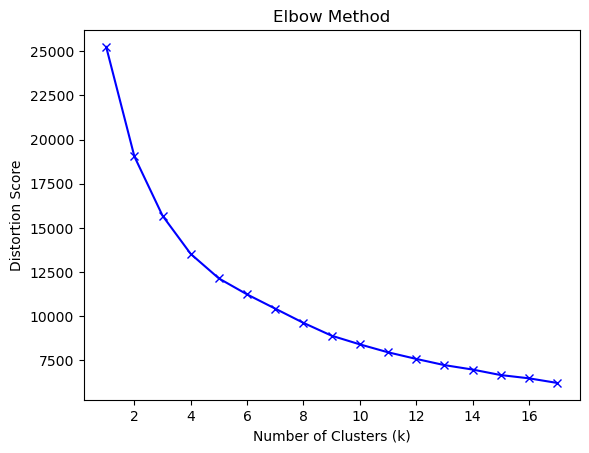

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the numeric columns for clustering
numeric_columns = classification_data.select_dtypes(include=[np.float64]).columns

# Create a list to store the distortion scores
distortions = []

# Try different values of k
k_values = range(1, 18)
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(classification_data[numeric_columns])
    
    # Calculate the distortion score
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Plot the elbow curve
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion Score')
plt.title('Elbow Method')
plt.show()


Number of clusters determined to be 3

In [88]:
# Perform clustering
X = classification_data.drop('name', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
classification_data['cluster'] = cluster_labels

# Display cluster assignment and sample data points from each cluster
for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    cluster_data = classification_data[classification_data['cluster'] == cluster]
    sample_data = cluster_data.sample(n=3)
    print(sample_data)
    print()

Cluster 0:

                           name  calories  total_fat   sat_fat  cholesterol  \
66840                    크림치즈머핀  0.892053   1.581044  1.270470     2.221818   
52705                  또띠아칩 치즈맛  0.840032   1.058370  0.943763    -0.330494   
49381  리터 카카오셀렉션 인텐스 74% (100g)  0.947134   2.336018  3.012905    -0.330494   

         sodium  total_carb   protein class  cluster  
66840 -0.277067    0.303471  0.219441  12.0        0  
52705  1.403060    0.725147 -0.192470  12.0        0  
49381 -0.491552   -0.181456  0.013485  10.0        0  

Cluster 1:

                       name  calories  total_fat   sat_fat  cholesterol  \
45653  카라벨라 크런치 모라 (AX52GH)  0.840032   1.929494  0.617056    -0.330494   
30195              코박사 엘더베리  1.452044  -0.567728 -0.471966    -0.330494   
42854  초코 실비아 다크 샤넬브릭 화이트박스  0.993035   1.813344  2.457504     0.629022   

         sodium  total_carb   protein class  cluster  
45653 -0.464384   -0.076037  0.157654   1.0        1  
30195 -0.370011    3.044366

This part contains questions to use when actually implementing the model. By answering these questions, they recommend foods in 18 classes, as well as similar foods obtained through clustering.

In [ ]:
print_size = 5
answer = [1,2]
answer23 = [1,2,3]
answer_list = []

question1 = int(input("What is your gender? \n1) male \n2) female\n"))
while question1 not in answer :
  print("Please enter it again\n")
  print("\n------------------------------------\n")
  question1 = int(input("What is your gender? \n1) male \n2) female\n\n\n"))
print("\n------------------------------------\n")
answer_list.append(question1)

question2 = int(input("What is your age group? \n1) children and early teens \n2) late teens and 30s \n3) middle-aged and elderly\n"))
while question2 not in  answer23:
  print("Please enter it again\n")
  print("\n------------------------------------\n")
  question2 = int(input("What is your age group? \n1) children and early teens \n2) late teens and 30s \n3) middle-aged and elderly\n"))
print("\n------------------------------------\n")
answer_list.append(question2)

question3 = int(input("Choose the purpose of your food intake. \n1) Diet \n2) Building muscles \n3) To fill the recommended intake\n"))
while question3 not in answer :
  print("Please enter it again\n")
  print("\n------------------------------------\n")
  question3 = int(input("Choose the purpose of your food intake. \n1) Diet \n2) Building muscles \n3) To fill the recommended intake\n"))
print("\n------------------------------------\n")
answer_list.append(question3)




### So through the above questions, we would like to divide the user into one of the 18 classes and recommend the right food, and also recommend similar foods that we learned through clustering.

# Predict class by putting a different dataset into this model with random forest (fastfood.csv)

In [89]:
fastfood = pd.read_csv("fastfood.csv")
print(fastfood.head())

  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0

Remove some variables from the given data and replace them with a form suitable for the random forest model.

In [90]:
selected_columns = ["item", "calories", "total_fat", "sat_fat","cholesterol", "sodium", "total_carb", "protein"]
fastfood_revised = fastfood[selected_columns]

# Print the new dataset
print(fastfood_revised.head())
print("\n")
print("Number of missing values per column")
print(fastfood_revised.isnull().sum())

                                        item  calories  total_fat  sat_fat  \
0           Artisan Grilled Chicken Sandwich       380          7      2.0   
1             Single Bacon Smokehouse Burger       840         45     17.0   
2             Double Bacon Smokehouse Burger      1130         67     27.0   
3  Grilled Bacon Smokehouse Chicken Sandwich       750         31     10.0   
4   Crispy Bacon Smokehouse Chicken Sandwich       920         45     12.0   

   cholesterol  sodium  total_carb  protein  
0           95    1110          44     37.0  
1          130    1580          62     46.0  
2          220    1920          63     70.0  
3          155    1940          62     55.0  
4          120    1980          81     46.0  


Number of missing values per column
item           0
calories       0
total_fat      0
sat_fat        0
cholesterol    0
sodium         0
total_carb     0
protein        1
dtype: int64


In [91]:
fastfood_revised.dropna(inplace = True)
print("Number of missing values per column after delete NA")
print(fastfood_revised.isnull().sum())

Number of missing values per column after delete NA
item           0
calories       0
total_fat      0
sat_fat        0
cholesterol    0
sodium         0
total_carb     0
protein        0
dtype: int64


In [92]:
fastfood_revised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 514
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item         514 non-null    object 
 1   calories     514 non-null    int64  
 2   total_fat    514 non-null    int64  
 3   sat_fat      514 non-null    float64
 4   cholesterol  514 non-null    int64  
 5   sodium       514 non-null    int64  
 6   total_carb   514 non-null    int64  
 7   protein      514 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 36.1+ KB


Standardize fastfood_revised dataset for input to model

In [93]:
# Exclude columns 'name' because they are not scaled.
numeric_columns = fastfood_revised.columns[1:]

# Create StandardScaler objects and convert data for standardization
scaler = StandardScaler()
fastfood_revised.loc[:,numeric_columns] = scaler.fit_transform(fastfood_revised.loc[:,numeric_columns])

In [94]:
# After scaling fastfood_revised dataset
fastfood_revised.head()

,item,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
0,Artisan Grilled Chicken Sandwich,-0.532678,-1.067148,-0.961638,0.371322,-0.196178,-0.065626,0.515600
1,Single Bacon Smokehouse Burger,1.105541,1.013876,1.397327,0.935041,0.485928,0.658054,1.025032
2,Double Bacon Smokehouse Burger,2.138332,2.218679,2.969971,2.384605,0.979367,0.698258,2.383520
3,Grilled Bacon Smokehouse Chicken Sandwich,0.785020,0.247183,0.296477,1.337698,1.008392,0.658054,1.534465
4,Crispy Bacon Smokehouse Chicken Sandwich,1.390449,1.013876,0.611006,0.773978,1.066444,1.421938,1.025032


Predicting class with the random forest model used earlier for fast food data

In [95]:
# Perform predictions
X_pred = fastfood_revised.drop(["item"], axis=1)
y_pred = rf_model.predict(X_pred)
print(y_pred)

[ 1.  3.  5. ... 12. 12. 12.]


In [96]:
fastfood_revised["class"] = y_pred

# Print the updated fastfood_revised DataFrame
fastfood_revised.head()

,item,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
0,Artisan Grilled Chicken Sandwich,-0.532678,-1.067148,-0.961638,0.371322,-0.196178,-0.065626,0.515600,1.0
1,Single Bacon Smokehouse Burger,1.105541,1.013876,1.397327,0.935041,0.485928,0.658054,1.025032,3.0
2,Double Bacon Smokehouse Burger,2.138332,2.218679,2.969971,2.384605,0.979367,0.698258,2.383520,5.0
3,Grilled Bacon Smokehouse Chicken Sandwich,0.785020,0.247183,0.296477,1.337698,1.008392,0.658054,1.534465,11.0
4,Crispy Bacon Smokehouse Chicken Sandwich,1.390449,1.013876,0.611006,0.773978,1.066444,1.421938,1.025032,6.0


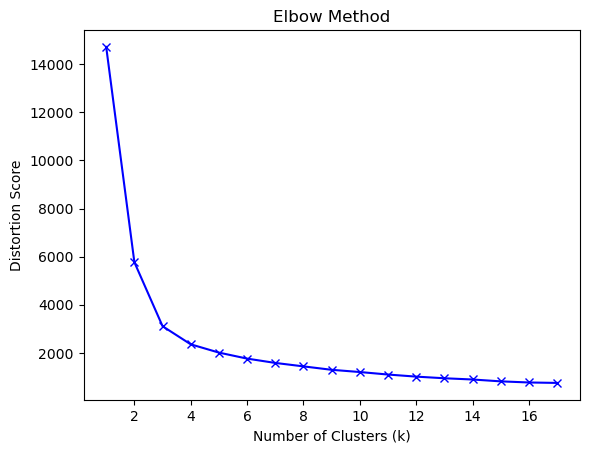

In [97]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the numeric columns for clustering
numeric_columns = fastfood_revised.select_dtypes(include=[np.float64]).columns

# Create a list to store the distortion scores
distortions = []

# Try different values of k
k_values = range(1, 18)
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fastfood_revised[numeric_columns])
    
    # Calculate the distortion score
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Plot the elbow curve
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion Score')
plt.title('Elbow Method')
plt.show()


In [98]:
# Perform clustering
X = fastfood_revised.drop('item', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
fastfood_revised['cluster'] = cluster_labels

# Display cluster assignment and sample data points from each cluster
for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    cluster_data = fastfood_revised[fastfood_revised['cluster'] == cluster]
    sample_data = cluster_data.sample(n=3)
    print(sample_data)
    print()

Cluster 0:

                                              item  calories  total_fat  \
44                      40 piece Chicken McNuggets  4.417593   4.409230   
78                   Smokehouse BBQ Bacon Sandwich -0.105316  -0.464746   
269  4 Piece Chicken Strip Basket w/ Country Gravy  1.782197   1.451986   

      sat_fat  cholesterol    sodium  total_carb   protein  class  cluster  
44   1.554592     3.592576  3.083737    2.386844  3.968421    5.0        0  
78  -1.276167     0.371322 -0.065562    0.014783  0.289185    1.0        0  
269  0.139213     0.129728  2.227476    2.386844  0.402392    6.0        0  

Cluster 1:

                                 item  calories  total_fat   sat_fat  \
481   Beefy Cheddar Crunchwrap Slider -0.425837  -0.409983 -0.332580   
273                  Chili Cheese Dog -0.532678  -0.136164  0.453741   
75   12 Piece Grilled Chicken Nuggets -1.138106  -1.176675 -1.118902   

     cholesterol    sodium  total_carb   protein  class  cluster  
481    -0.